# Research Questions
- How do the risk factors differ for different age groups of patients?
- How do the risk factors differ for male vs female patients?
- What is the relation of pollution to the level of cancer in patients?
- What is the relation of smoking habits to the level of cancer in patients?



# Rough Breakdown of Tasks:
- Review data
- Clean data - Remove unnecessary symptoms from dataset (coughing of blood, difficulty swallowing, shortness of breath, chest - pain, fatigue, weight loss, wheezing, swallowing difficulty, dry cough), check for duplicates, null values, etc
- Find subgroups
- Subgroups:
- Men vs women, young vs old, high level smoking vs low level smoking
- Use bins for age, split into men and women for gender, use bins/median for smoking levels
- Use subgroups to chart below factors (assess which charts best fit which data, (scatter plots, pie charts, histograms - plot - linear regressions if necessary)
- Air Pollution, Alcohol Use, Genetic risk, Obesity, Smoking, Passive Smoker, Level of Cancer - Outcome Variable
- Use charts to come up with final analysis of how risk variables play into lung cancer

 

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [3]:
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [4]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [5]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [6]:
# Gender Labels

df['Gender_Category'] = np.where(df['Gender'] == 1, 'Male', 'Female')

In [7]:
# List of risk factors
risk_factors = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
                'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity',
                'Smoking', 'Passive Smoker']

# Compute the median of risk factors by gender
median_risk_factors_by_gender = df.groupby('Gender_Category')[risk_factors].median()

# Reset the index if necessary
# median_risk_factors_by_gender.reset_index(inplace=True)

# Display the median values for risk factors by gender
print(median_risk_factors_by_gender)


                 Air Pollution  Alcohol use  Dust Allergy  \
Gender_Category                                             
Female                     3.0          2.0           4.0   
Male                       5.0          6.0           6.0   

                 OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
Gender_Category                                                             
Female                            4.0           3.0                   4.0   
Male                              6.0           6.0                   6.0   

                 Balanced Diet  Obesity  Smoking  Passive Smoker  
Gender_Category                                                   
Female                     3.0      4.0      3.0             3.0  
Male                       6.0      4.0      4.0             4.0  


Are the Risk Factors diffrent for young vs old patients ?

<Axes: ylabel='Frequency'>

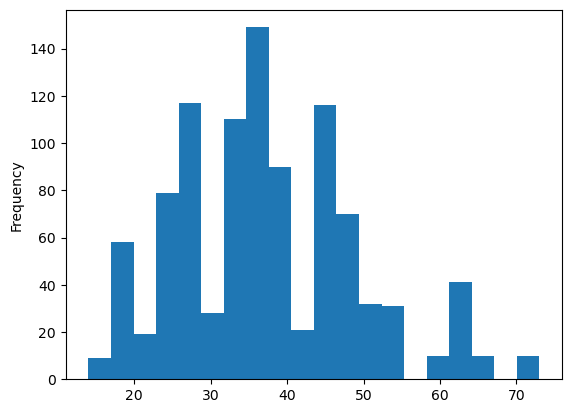

In [8]:
df['Age'].plot(kind = 'hist', bins = 20)

In [9]:
age_count = df['Age'].value_counts().sort_index()
age_count

Age
14     9
17    20
18    18
19    20
22    19
23    19
24    30
25    30
26    37
27    48
28    32
29    19
31     9
32    31
33    69
34    10
35    77
36    21
37    51
38    69
39    21
42    20
43     1
44    51
45    42
46    23
47    20
48    40
49    10
51     1
52    31
53    19
54     1
55    11
61    10
62    30
63     1
64    10
65    10
73    10
Name: count, dtype: int64

In [10]:
age_count[age_count.index<=32].sum(), age_count[age_count.index<=45].sum() - age_count[age_count.index<=32].sum(), age_count[age_count.index>45].sum()

(341, 432, 227)

In [11]:
# Creating Age column for young and old patients

df['Age_Category'] = np.where(df['Age'] <= 32, '1. Young', np.where(df['Age'] <= 45, '2. Adult', '3. Old'))
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Gender_Category,Age_Category
0,0,P1,33,1,2,4,5,4,3,2,...,2,2,3,1,2,3,4,Low,Male,2. Adult
1,1,P10,17,1,3,1,5,3,4,2,...,7,8,6,2,1,7,2,Medium,Male,1. Young
2,2,P100,35,1,4,5,6,5,5,4,...,9,2,1,4,6,7,2,High,Male,2. Adult
3,3,P1000,37,1,7,7,7,7,6,7,...,3,1,4,5,6,7,5,High,Male,2. Adult
4,4,P101,46,1,6,8,7,7,7,6,...,4,1,4,2,4,2,3,High,Male,3. Old


In [12]:
age_factors_summary_df = df.groupby(['Age_Category'])[['Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring']].median()#.reset_index()
age_factors_summary_df

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age_Category,,,,,,,,,,,,,,,,,,,,,
1. Young,3.0,3.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,...,4.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0
2. Adult,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,...,4.0,4.0,4.0,3.0,4.0,5.0,4.0,4.0,3.0,3.0
3. Old,5.0,6.0,6.0,5.0,5.0,5.0,5.0,4.0,3.0,3.0,...,5.0,3.0,3.0,5.0,2.0,2.0,3.0,3.0,4.0,2.0


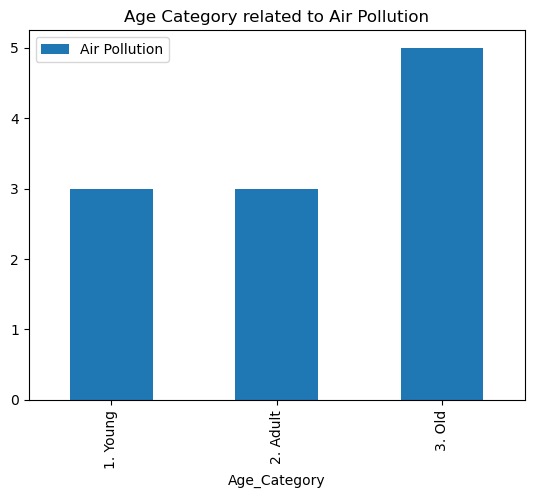

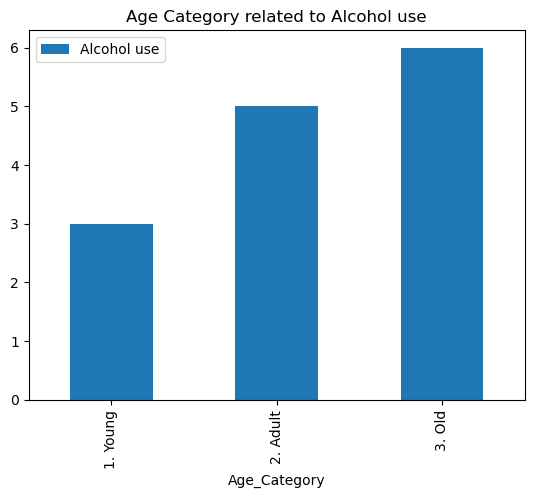

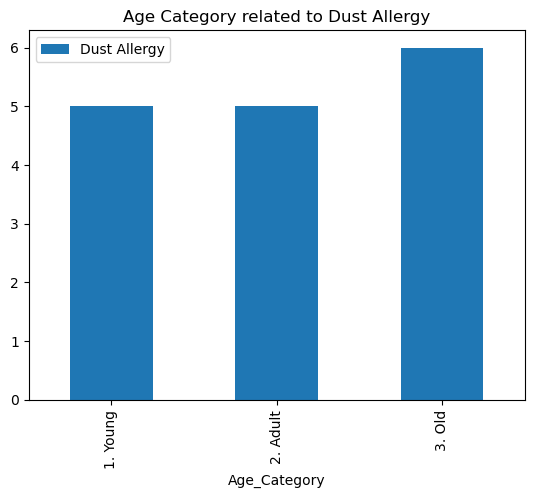

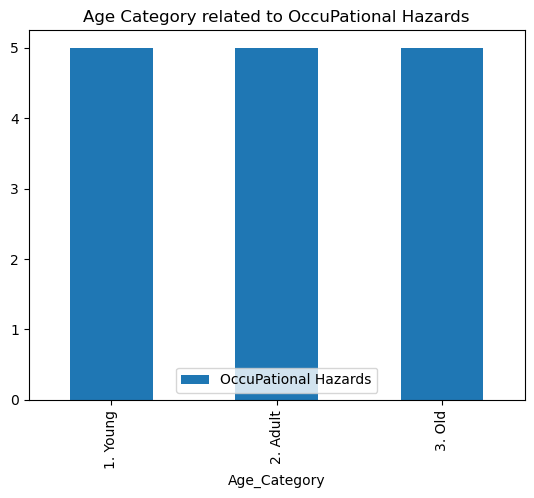

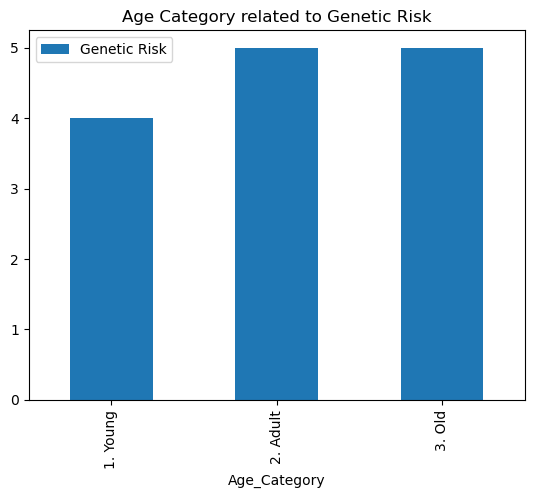

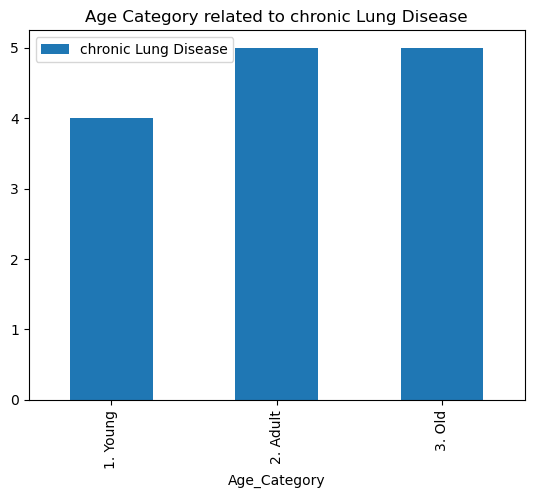

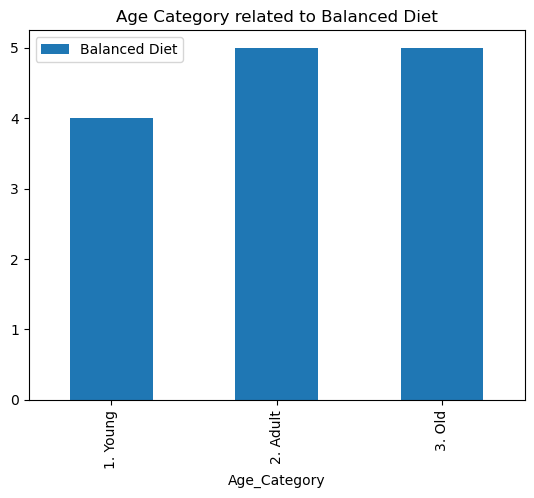

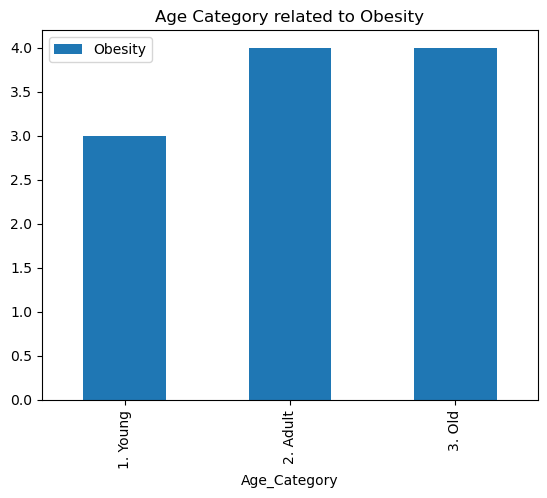

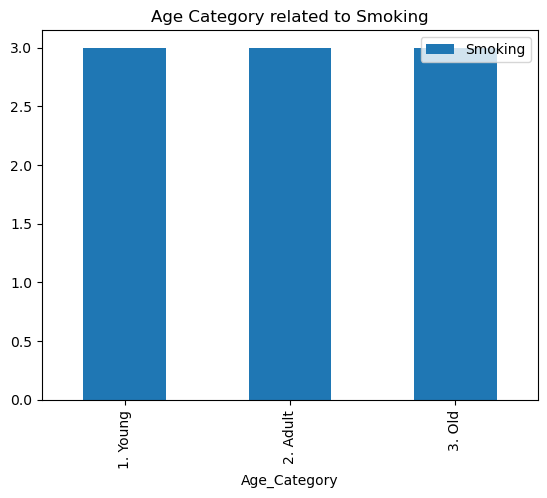

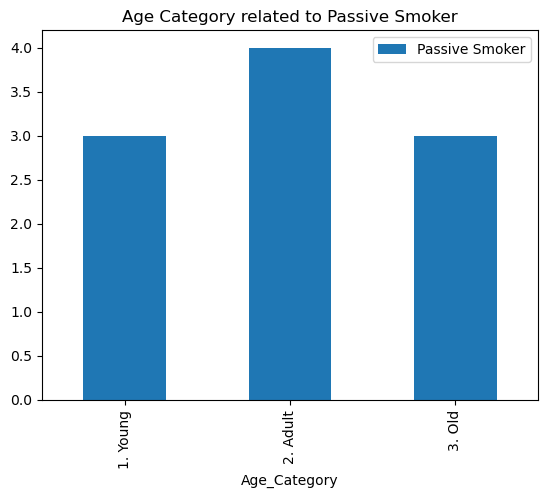

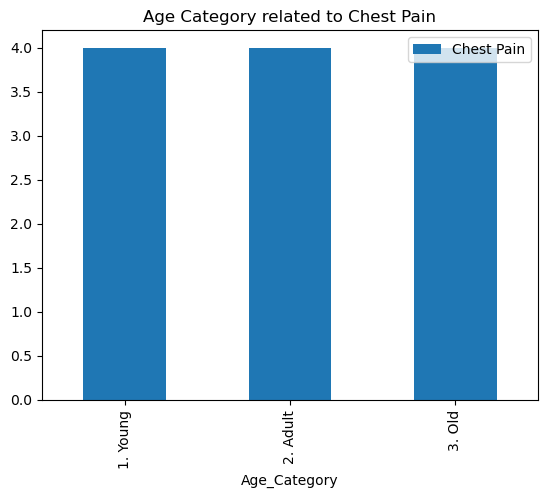

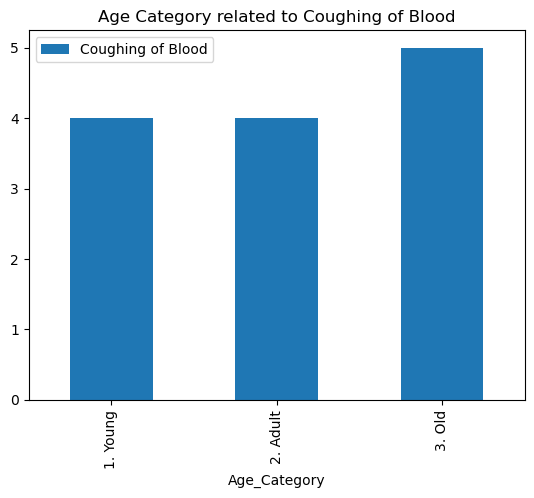

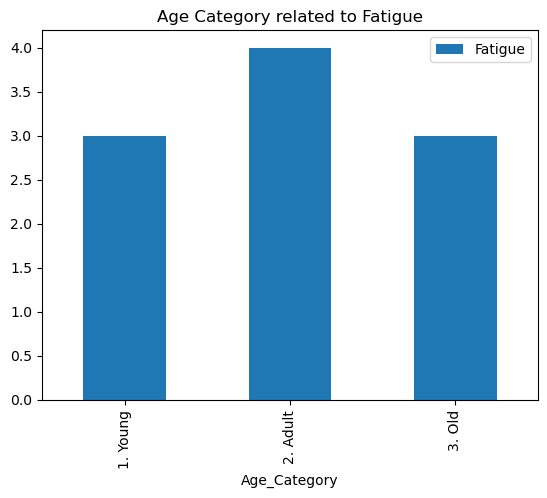

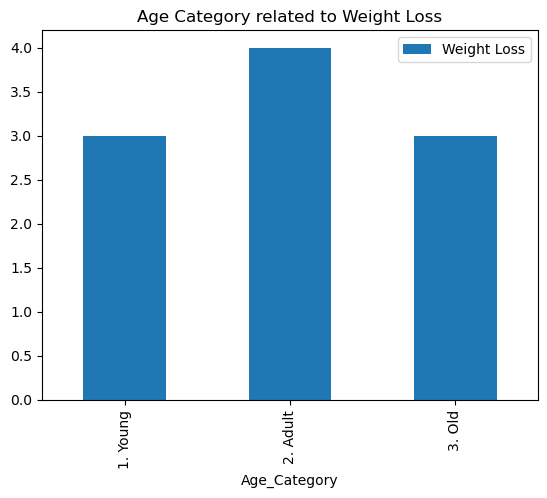

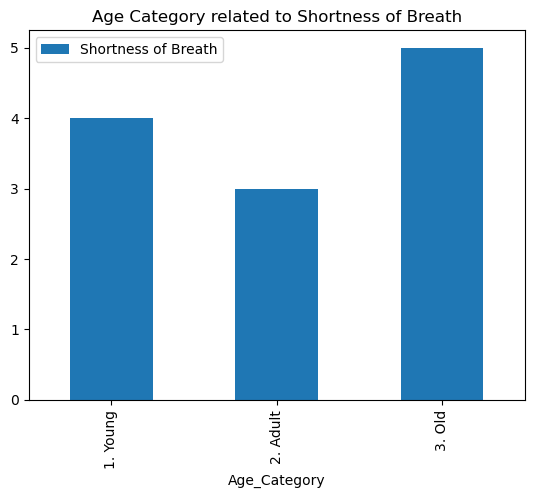

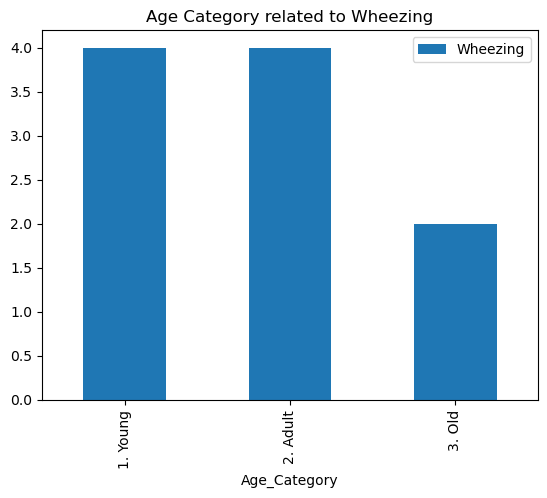

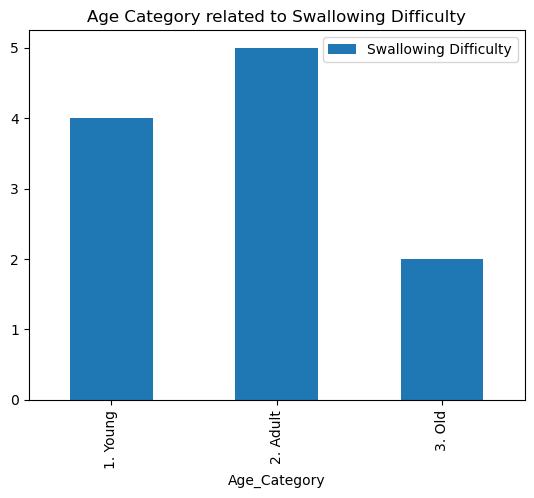

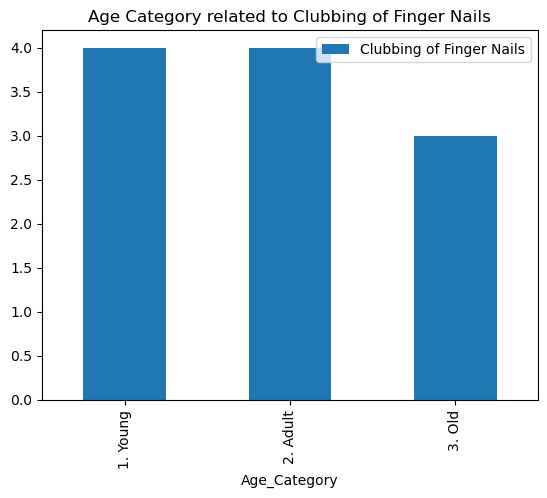

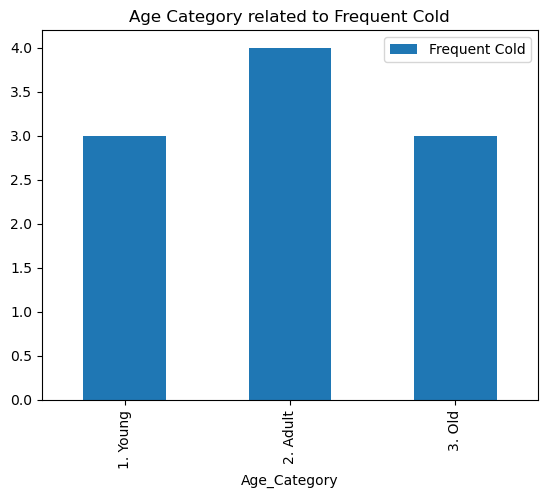

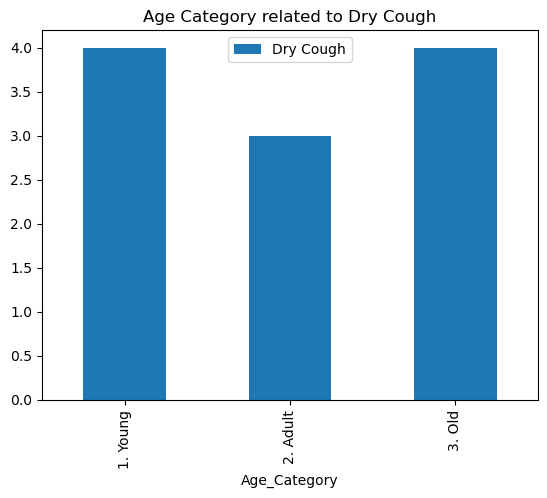

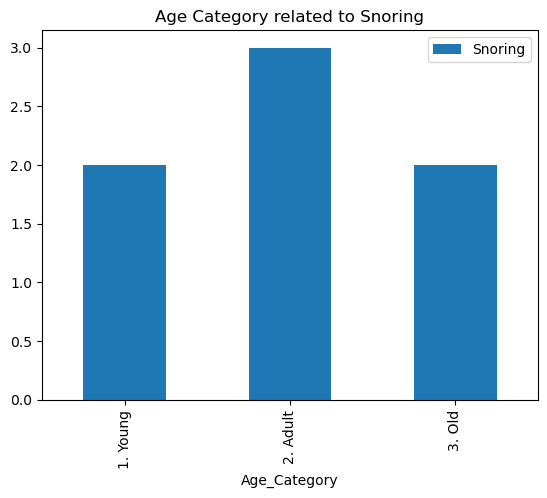

In [13]:
for i in age_factors_summary_df.columns:
    age_factors_summary_df[i].plot(kind = 'bar')
    #plt.pie(val,labels=index,autopct='%1.1f%%')
    plt.title(f'Age Category related to {i}')
    plt.legend()
    plt.show()

# Are men or women more likely to develop lung cancer?

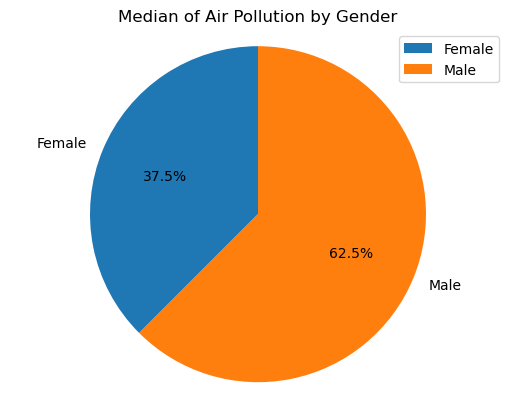

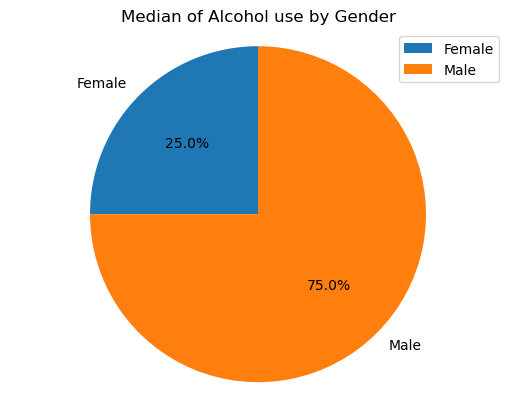

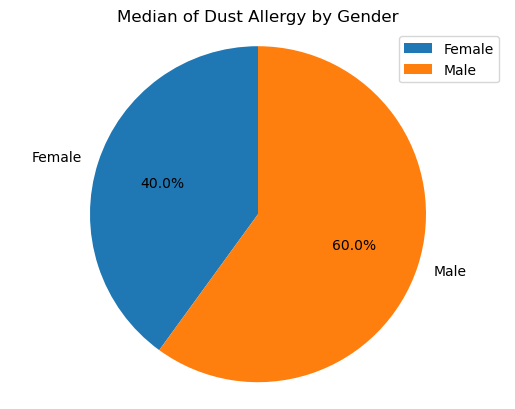

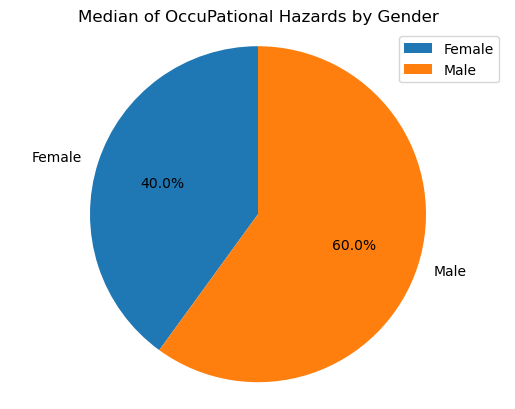

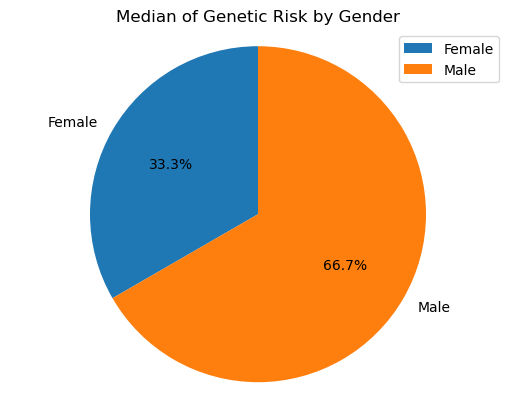

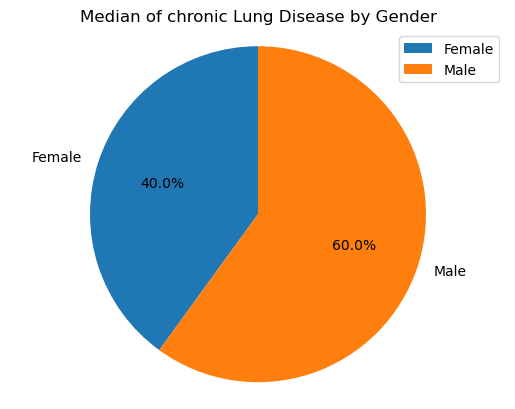

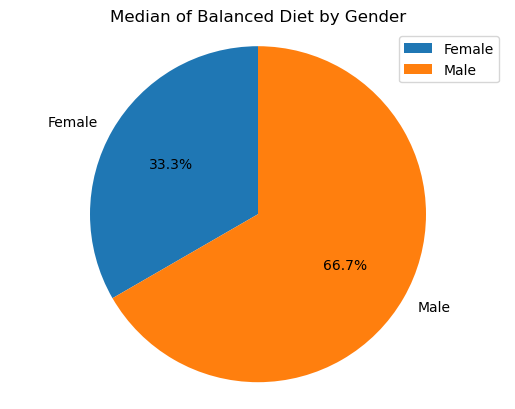

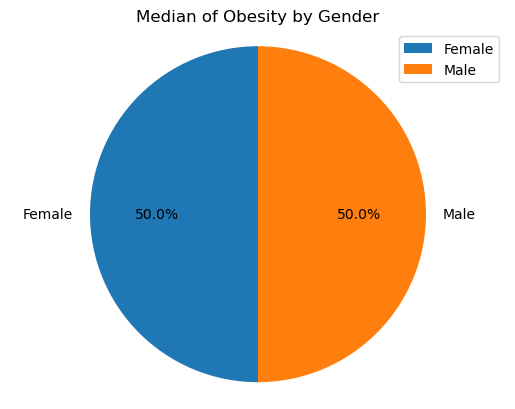

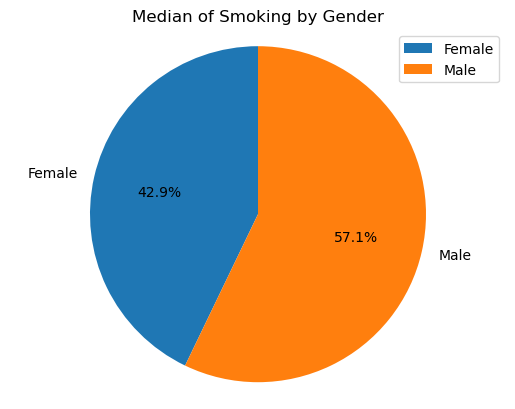

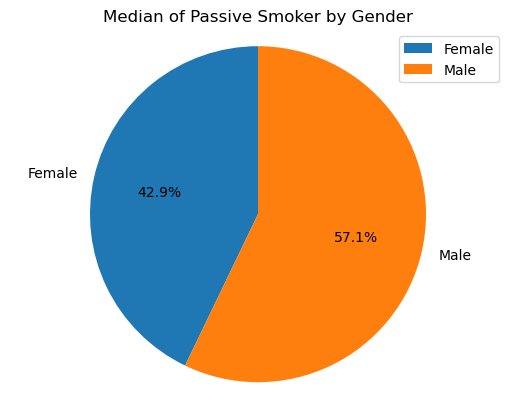

In [14]:
# Iterate through each risk factor
for factor in risk_factors:
    # Get median values for each gender category for the current risk factor
    median_values = median_risk_factors_by_gender[factor]

    # Create a pie chart for median values of risk factor by gender
    fig, ax = plt.subplots()
    ax.pie(median_values, labels=median_values.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Median of {factor} by Gender')
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Add a legend
    ax.legend(median_values.index, loc='upper right')
    
    plt.show()

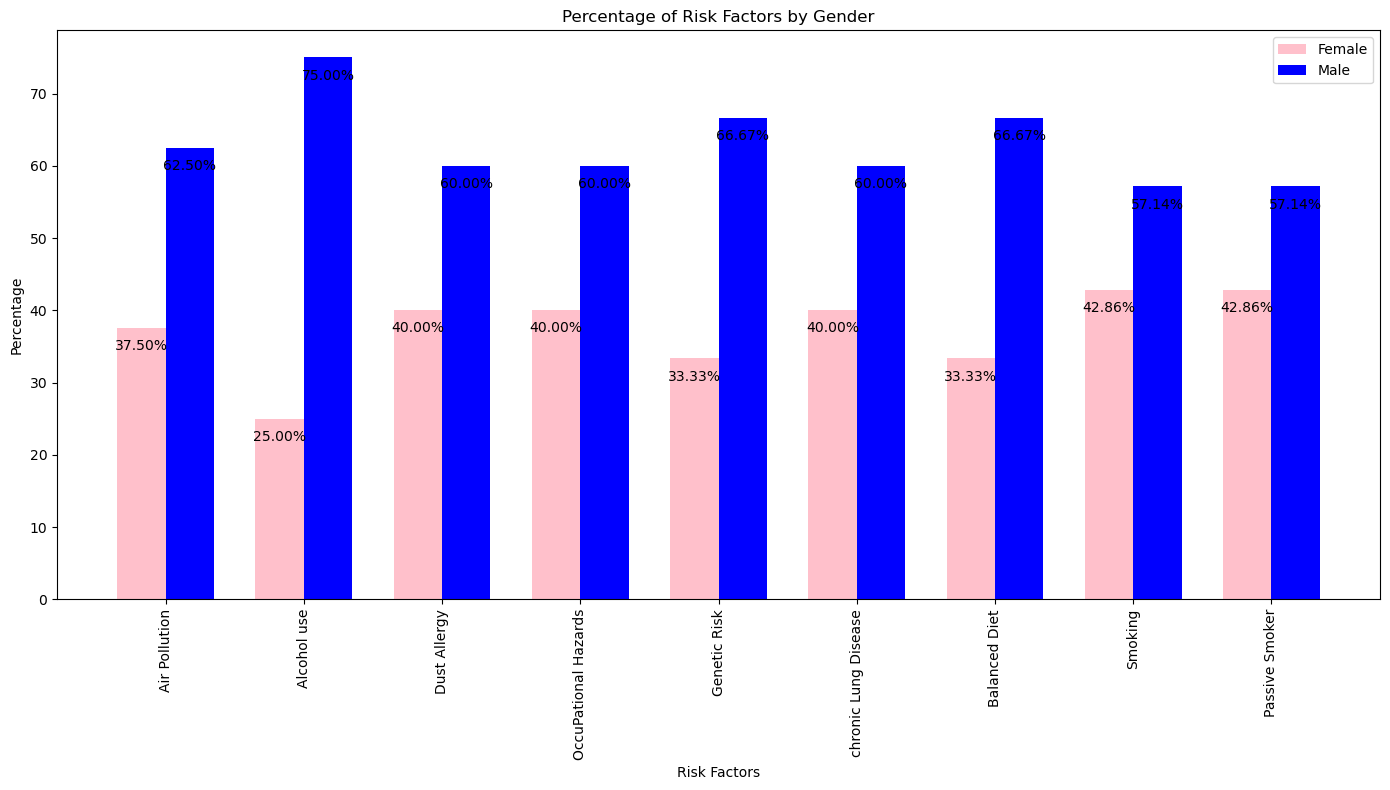

In [15]:
# Risk factors by the gender
risk_factors = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
                'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet',
                'Smoking', 'Passive Smoker']



# Extract median values for females and males for each risk factor
median_female_values = [median_risk_factors_by_gender.loc['Female', factor] for factor in risk_factors]
median_male_values = [median_risk_factors_by_gender.loc['Male', factor] for factor in risk_factors]

# Calculate total median values for each risk factor
total_values = [female + male for female, male in zip(median_female_values, median_male_values)]

# Calculate percentage values for females and males
female_percentages = [female / total * 100 for female, total in zip(median_female_values, total_values)]
male_percentages = [male / total * 100 for male, total in zip(median_male_values, total_values)]

# Create arrays for the position of bars
ind = np.arange(len(risk_factors))  # the x locations for the groups
width = 0.35  # the width of the bars

# Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the bars for females and males
bars1 = ax.bar(ind, female_percentages, width, color='pink', label='Female')
bars2 = ax.bar(ind + width, male_percentages, width, color='blue', label='Male')

# Add labels and title
ax.set_xlabel('Risk Factors')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Risk Factors by Gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(risk_factors, rotation=90)
ax.legend()

# Add percentage labels on top of the bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        va = 'bottom' if height < 20 else 'top'  # Alternate label position based on bar height
        ax.annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3) if va == 'bottom' else (0, -8),  # Set vertical offset
                    textcoords="offset points",
                    ha='center', va=va, color='black')

autolabel(bars1)
autolabel(bars2)

plt.tight_layout()
plt.show()


In [ ]:
cancer_level_gender_df = df.groupby(['Level','Gender_Category'])[['Patient Id']].count().reset_index()
cancer_level_gender_df.columns = ['Cancer Level','Gender Category','Patient Count']
cancer_level_gender_df


,Cancer Level,Gender Category,Patient Count
0,High,Female,113
1,High,Male,252
2,Low,Female,154
3,Low,Male,149
4,Medium,Female,135
5,Medium,Male,197


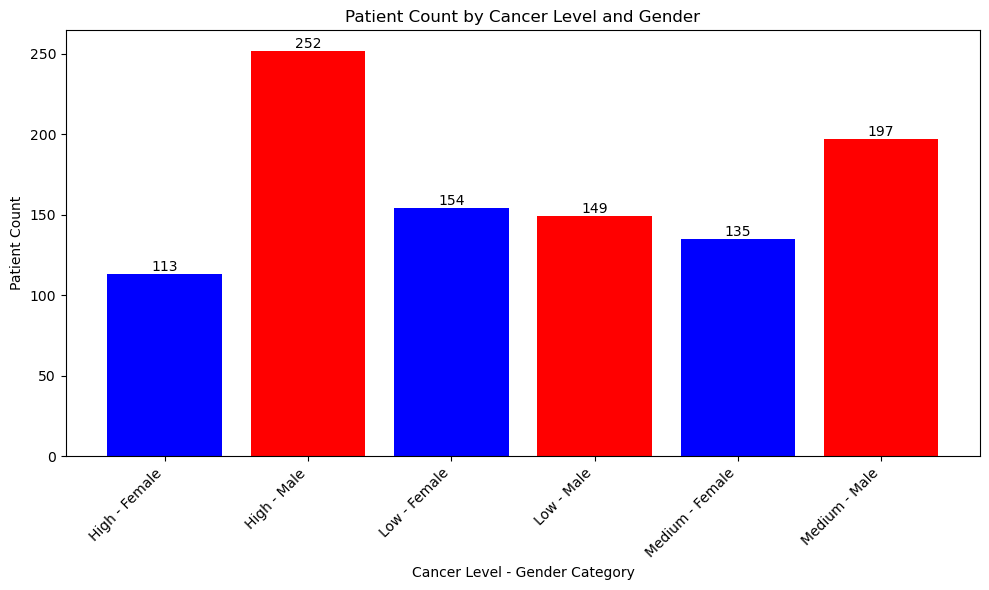

In [ ]:
cancer_level_gender_df = df.groupby(['Level','Gender_Category'])[['Patient Id']].count().reset_index()
cancer_level_gender_df.columns = ['Cancer Level', 'Gender Category', 'Patient Count']

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(cancer_level_gender_df['Cancer Level'] + ' - ' + cancer_level_gender_df['Gender Category'],
               cancer_level_gender_df['Patient Count'], color=['blue', 'red'])

# Add labels and title
plt.xlabel('Cancer Level - Gender Category')
plt.ylabel('Patient Count')
plt.title('Patient Count by Cancer Level and Gender')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add patient count on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom', color='black')

# Show plot
plt.tight_layout()
plt.show()

# Relation of pollution level to level of cancer?

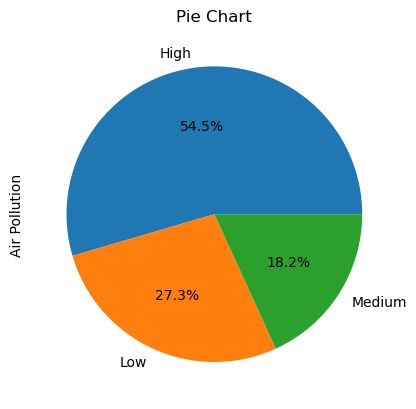

In [ ]:
cancer_level_pollution_df = df.groupby(['Level'])['Air Pollution'].median()#.reset_index()
cancer_level_pollution_df.plot(kind = 'pie',autopct='%1.1f%%')
plt.title("Pie Chart")
plt.show()

 What is the relation of smoking habits to the level of cancer in patients?

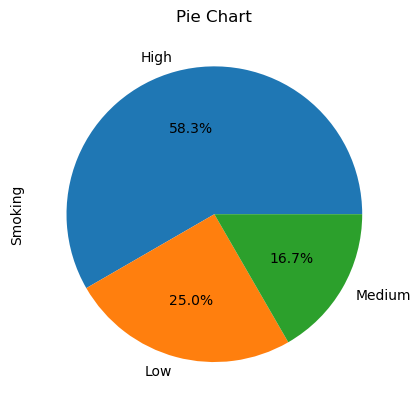

In [ ]:
cancer_level_smoking_df = df.groupby(['Level'])['Smoking'].median()#.reset_index()
cancer_level_smoking_df.plot(kind = 'pie',autopct='%1.1f%%')
plt.title("Pie Chart")
plt.show()



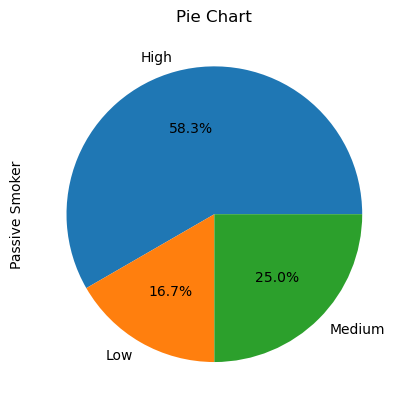

In [ ]:
cancer_level_passive_smoker_df = df.groupby(['Level'])['Passive Smoker'].median()#.reset_index()
cancer_level_passive_smoker_df.plot(kind = 'pie',autopct='%1.1f%%')
plt.title("Pie Chart")
plt.show()

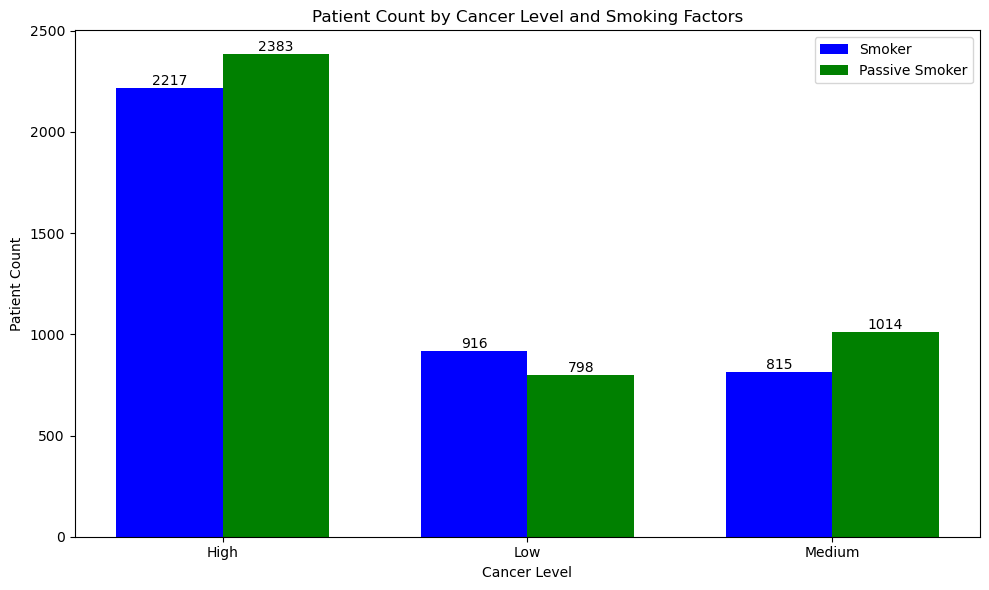

In [ ]:
# Group by 'Level' and count the number of patients for each category
cancer_level_smoking_df = df.groupby('Level')[['Smoking', 'Passive Smoker']].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(cancer_level_smoking_df))

bars1 = plt.bar(index, cancer_level_smoking_df['Smoking'], color='blue', width=bar_width, label='Smoker')
bars2 = plt.bar([i + bar_width for i in index], cancer_level_smoking_df['Passive Smoker'], color='green', width=bar_width, label='Passive Smoker')

# Add labels and title
plt.xlabel('Cancer Level')
plt.ylabel('Patient Count')
plt.title('Patient Count by Cancer Level and Smoking Factors')
plt.xticks([i + bar_width / 2 for i in index], cancer_level_smoking_df['Level'])

# Add patient count on top of each bar
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom', color='black')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

In [19]:
df[df['Level'] == 'Low']['Smoking'],df[df['Level'] == 'Medium']['Smoking'],df[df['Level'] == 'High']['Smoking']

0      3
6      3
7      1
14     2
33     3
      ..
949    3
950    3
976    3
977    1
979    2
Name: Smoking, Length: 303, dtype: int64

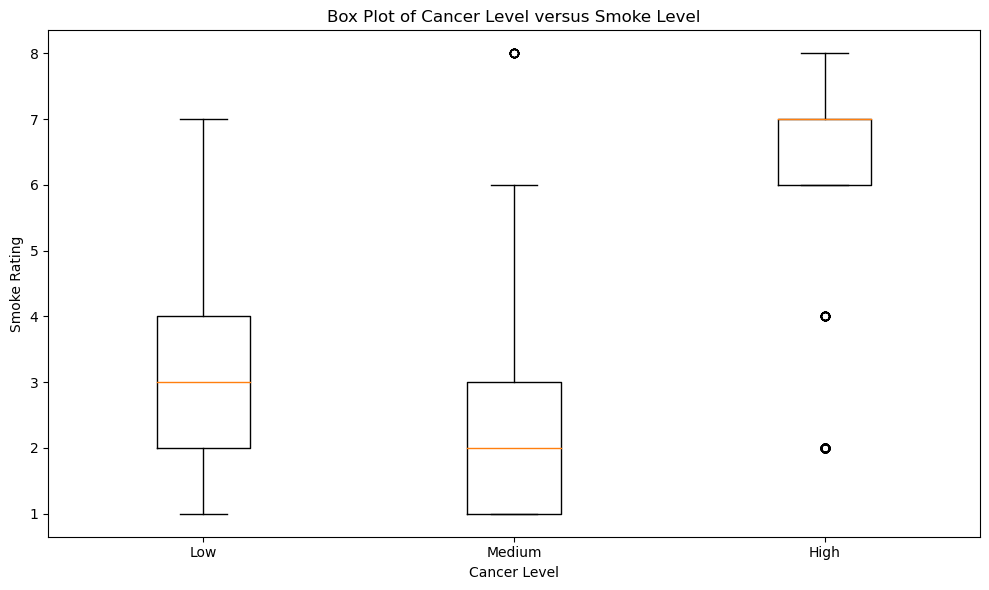

In [21]:
cancer_level_smoking_df = df.groupby('Level')[['Smoking', 'Passive Smoker']].sum().reset_index()

# Create a box plot for the level of cancer in smoking patients vs. passive smokers
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Level'] == 'Low']['Smoking'],df[df['Level'] == 'Medium']['Smoking'],df[df['Level'] == 'High']['Smoking']], 
            labels=['Low', 'Medium', 'High'])

# Add labels and title
plt.xlabel('Cancer Level')
plt.ylabel('Smoke Rating')
plt.title('Box Plot of Cancer Level versus Smoke Level')

# Show plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Level', ylabel='smoke rating'>

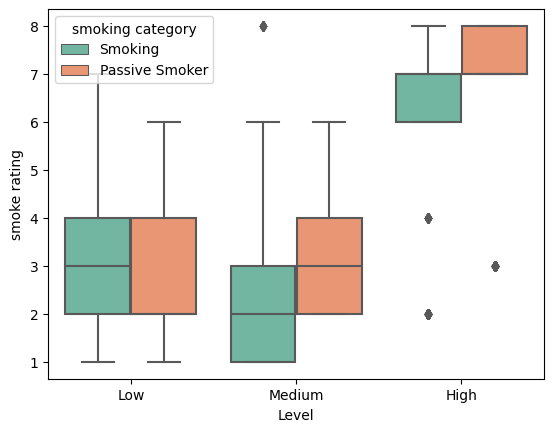

In [28]:
df_melt=df.melt(
   id_vars=['Level'],
   value_vars=['Smoking','Passive Smoker'])
df_melt.columns = ["Level","smoking category", "smoke rating"]
sns.boxplot(x = df_melt['Level'], 
            y = df_melt['smoke rating'], 
            hue = df_melt['smoking category'], 
            palette = 'Set2')
   
   